<a href="https://colab.research.google.com/github/manuel1729/Simulaci-n-1/blob/main/Transformada_Inversa_Triangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gómez Cruz Manuel

**MÉTODO DE LA TRANSFORMADA INVERSA**

Pasos:

1) Dado f(x), calculamos $F(x)=∫_{-∞}^{x}f(t)dt$

2)Suponer R~(0,1) y resolver $F(x)=R$ $\quad$ para obtener $\quad$ $x=F^{-1}(R)$

**DISTRIBUCIÓN TRIANGULAR**

$f(x)=\left\{\begin{array}{lc} \frac{2}{(c-a)(b-a)}(x-a) & a\leq x \leq b\\ \frac{2}{(c-a)(b-c)}(x-c) & b\leq x\leq c \end{array}\right.$

Tomando a=1 b=3 c=5

$f(x)=\left\{\begin{array}{lc} \frac{1}{4}(x-1) & 1\leq x \leq 3\\ -\frac{1}{4}(x-5) & 3\leq x\leq 5 \end{array}\right.$


Su distribución acumulada

Paso 1:

1) $F(x)=\int_{-\infty}^x f(y)dy = \left\{\begin{array}{lc} \frac{(x-a)^2}{(c-a)(b-a)} & a\leq x \leq b \\ 1+\frac{(x-c)^2}{(c-a)(b-c)} & b\leq x\leq c \end{array}\right.$

Paso 2:

2)Suponemos R~(0,1) y resolvemos R=f(x) para obtener $x=F^{-1}(R)$

En este caso:

$x=\left\{\begin{array}{lc} \sqrt{R(c-a)(b-a)}+a & a\leq x \leq b \\c- \sqrt{(R-1)(c-a)(b-c)} & b\leq x\leq c \end{array}\right.$


In [ ]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import math

In [ ]:
#Valores de distribución
a=1
b=3
c=5

In [ ]:
#Guardamos en lista cada valor que se genere y comparar los R
def inversa(n):
  x=[]
  for i in range(n):
    R=rd.random()
    if R<((b-a)/(c-a)):
      x.append(math.sqrt(R*(c-a)*(b-a))+a)
    else:
      x.append(-math.sqrt((R-1)*(c-a)*(b-c))+c)
  return x

In [ ]:
#Prueba con n=10000
exp1 = inversa(10000)

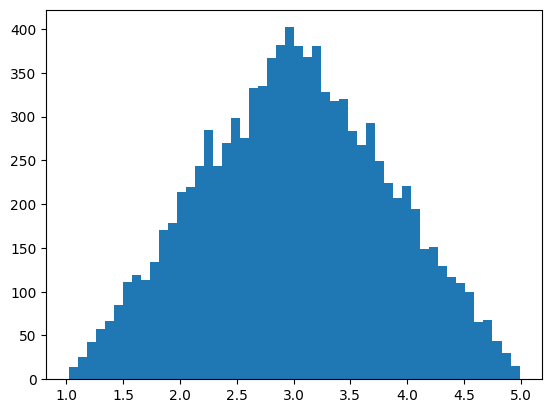

In [ ]:
#Mostramos el histograma
plt.hist(exp1, bins=50)
plt.show()

In [ ]:
#MOstramos media, desviación aproximada del experimento
print("Media aprox: ",np.mean(exp1))
print("Varianza aprox: ",np.var(exp1))
print("Desviación: ",np.std(exp1))

Media aprox:  3.0128868522576933
Varianza aprox:  0.6681156957136775
Desviación:  0.8173834447269394


In [ ]:
#Calculo de media, varianza y deviación analítica
#Librería para integrar
from scipy.integrate import quad

In [ ]:
#Distribución triangular
def f(x, a, b, c):
    if a<=x<=b:
        return 2*(x-a)/((b-a)*(c-a))
    elif b<x<=c:
        return 2*(x-c)/((b-c)*(c-a))

In [ ]:
def media(f, a, b, c):
    media_val, _ = quad(lambda x: x * f(x, a, b, c), a, c)
    return media_val

def varianza(f, a, b, c):
    ex2, _ = quad(lambda x: x**2 * f(x, a, b, c), a, c)
    var_val = ex2 - media(f, a, b, c)**2
    return var_val

In [ ]:
media_exac=media(f, a, b, c)
varianza_exac=varianza(f, a, b, c)

print("Media exacta: ",media_exac)
print("Varianza exacta: ", varianza_exac)
print("Desviación exacta: ",varianza_exac**(1/2))

Media exacta:  3.0
Varianza exacta:  0.6666666666666661
Desviación exacta:  0.8164965809277257
